<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Sort_K_Sorted_Array_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sort K-Sorted Array

Write a function that takes in a non-negative integer k and a k-sorted array of integers and returns the sorted version of the array. Your function can either sort the array in place or create an entirely new array.

A k-sorted array is a partially sorted array in which all elements are at most k positions away from their sorted position. For example, the array `[3, 1, 2, 2]` is k-sorted with `k = 3`, because each element in the array is at most 3 positions away from its sorted position.

Note that you're expected to come up with an algorithm that can sort the k-sorted array faster than in O(nlog(n)) time.

Sample Input

```
array = [3, 2, 1, 5, 4, 7, 6, 5]
k = 3
```



Sample Output

```
[1, 2, 3, 4, 5, 5, 6, 7]
```



In [1]:
# Time O(nlog k)
# Space O(k)

def sortKSortedArray(array, k):
  minheap_k_elements = MinHeap(array[:min(k + 1, len(array))])
  sorted_idx = 0
  for idx in range(k + 1, len(array)):
    min_element = minheap_k_elements.remove()
    array[sorted_idx] = min_element
    sorted_idx += 1
    minheap_k_elements.insert(array[idx])

  while len(minheap_k_elements.heap) > 0:
    min_element = minheap_k_elements.remove()
    array[sorted_idx] = min_element
    sorted_idx += 1
  return array

class MinHeap:
  def __init__(self, array):
    self.heap = self.buildHeap(array)

  def buildHeap(self, array):
    last_parent_idx = (len(array) - 2) // 2
    for current_idx in reversed(range(last_parent_idx + 1)):
      self.sift_down(current_idx, len(array) - 1, array)
    return array

  def sift_down(self, current_idx, end_idx, heap):
    child_one_idx = current_idx * 2 + 1
    while child_one_idx <= end_idx:
      child_two_idx = current_idx * 2 + 2
      if child_two_idx <= end_idx and heap[child_two_idx] < heap[child_one_idx]:
        idx_to_swap = child_two_idx
      else:
        idx_to_swap = child_one_idx
      if heap[idx_to_swap] < heap[current_idx]:
        self.swap(current_idx, idx_to_swap, heap)
        current_idx = idx_to_swap
        child_one_idx = current_idx * 2 + 1
      else:
        return

  def sift_up(self, current_idx, heap):
    parent_idx = (current_idx - 1) // 2
    while current_idx > 0 and heap[current_idx] < heap[parent_idx]:
      self.swap(current_idx, parent_idx, heap)
      current_idx = parent_idx
      parent_idx = (current_idx - 1) // 2

  def peek(self):
    return self.heap[0]

  def remove(self):
    self.swap(0, len(self.heap) - 1, self.heap)
    value_to_remove = self.heap.pop()
    self.sift_down(0, len(self.heap) - 1, self.heap)
    return value_to_remove

  def insert(self, value):
    self.heap.append(value)
    self.sift_up(len(self.heap) - 1, self.heap)

  def swap(self, i, j, heap):
    heap[i], heap[j] = heap[j], heap[i]

In [2]:
array = [3, 2, 1, 5, 4, 7, 6, 5]
k = 3
sortKSortedArray(array, k)

[1, 2, 3, 4, 5, 5, 6, 7]

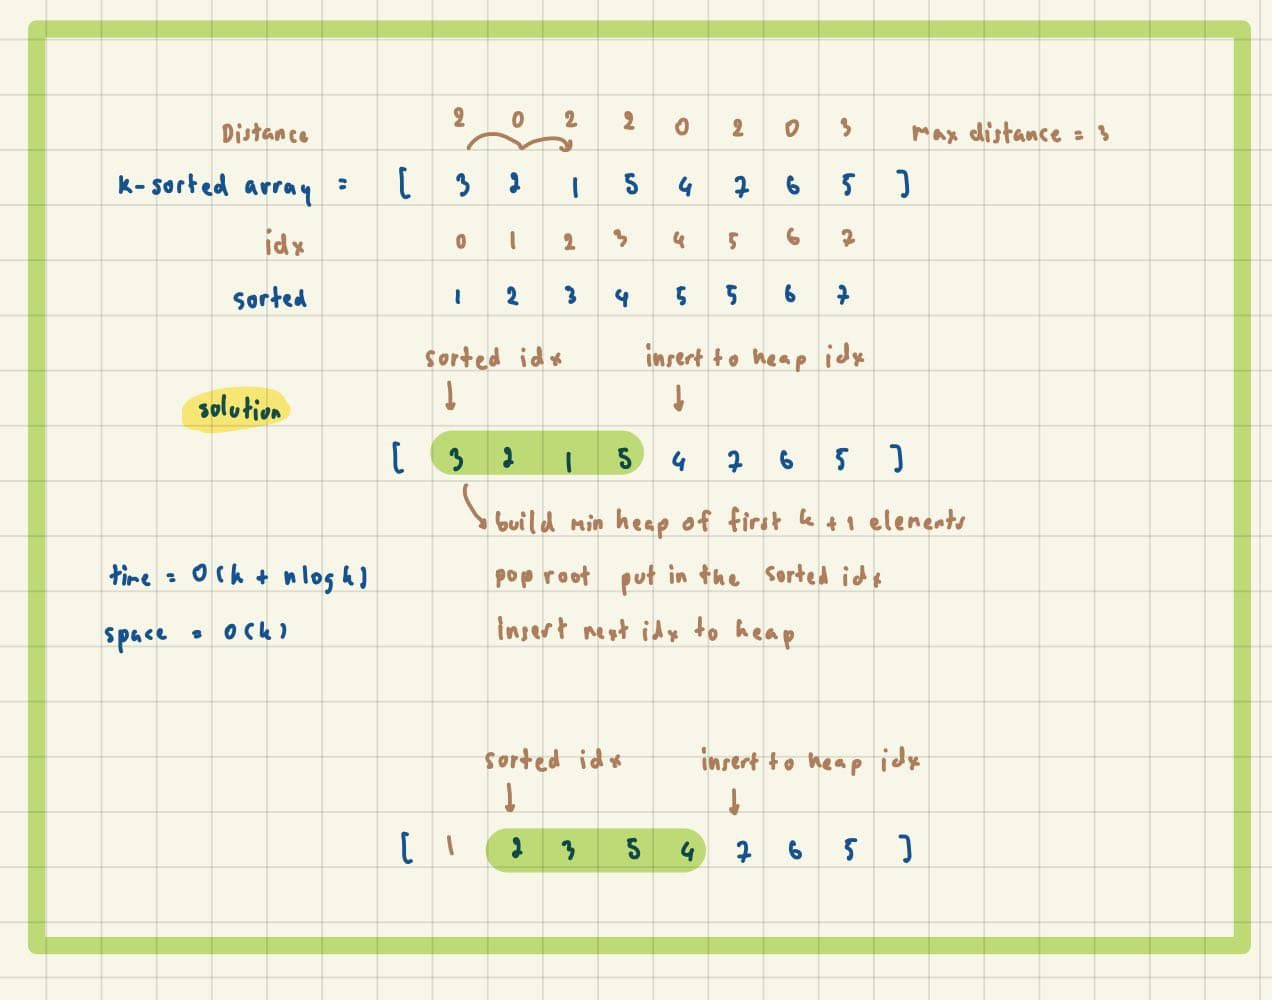